In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("spotify_playlist_data.csv")
data.head()

,playlist_name,playlist_followers,track_name,artist_name,artist_genres,album_name,album_type,album_release_date,duration_ms,popularity,danceability,energy,tempo,valence,mode_majorminor
0,Top 50 - Indonesia,780030,APT.,ROSÉ,['k-pop'],APT.,single,2024-10-18,169917,96,0.777,0.783,149.027,0.939,0
1,Top 50 - Indonesia,780030,Die With A Smile,Lady Gaga,"['art pop', 'dance pop', 'pop']",Die With A Smile,single,2024-08-16,251667,100,0.521,0.592,157.969,0.535,0
2,Top 50 - Indonesia,780030,Satu Bulan,Bernadya,[],Terlintas,single,2023-06-22,200476,84,0.436,0.299,85.744,0.244,1
3,Top 50 - Indonesia,780030,Masing Masing,Ernie Zakri,['malaysian pop'],Aura,album,2023-11-03,234589,77,0.449,0.496,133.845,0.389,1
4,Top 50 - Indonesia,780030,Serana,For Revenge,"['bandung indie', 'indonesian emo', 'indonesia...",Perayaan Patah Hati - Babak 1,album,2022-09-06,250000,77,0.439,0.652,130.029,0.247,1


In [3]:
df = data.drop(columns = ['artist_genres','album_type','album_release_date','duration_ms'])
# Replace "TOP 50 - Country" with just "Country"
df['playlist_name'] = df['playlist_name'].str.replace(r'Top 50 - ', '', regex=True)


#### Step 1 : Identify Cross-Country Trending Songs

In [4]:
df.groupby('track_name')['playlist_name'].unique().reset_index()

,track_name,playlist_name
0,3D (feat. Jack Harlow),[South Korea]
1,APT.,"[Indonesia, Japan, South Korea, Philippines, I..."
2,"Aaj Ki Raat (From ""Stree 2"")",[India]
3,"Aayi Nai (From ""Stree 2"")",[India]
4,"Akhiyaan Gulaab (From ""Teri Baaton Mein Aisa U...",[India]
...,...,...
222,水平線,[Japan]
223,点描の唄,[Japan]
224,花束,[Japan]
225,青と夏,[Japan]


In [5]:
# Count occurrences of each track across playlists
cross_country_hits = df.groupby('track_name')['playlist_name'].nunique().reset_index()
cross_country_hits = cross_country_hits[cross_country_hits['playlist_name'] > 1]
cross_country_hits

,track_name,playlist_name
1,APT.,5
9,BIRDS OF A FEATHER,3
25,CRAZY,2
29,Cherish (My Love),2
33,Die With A Smile,3
57,I'll Be There,2
68,It Will Rain,2
87,Magnetic,2
90,Mantra,2
99,Moonlit Floor (Kiss Me),3


In [6]:
# Filter data for cross-country hits
trending_songs = df[df['track_name'].isin(cross_country_hits['track_name'])]

In [7]:
# Create a table to show each track along with the countries (playlists) where it appears and its country counts.
hits_playlist = trending_songs.groupby('track_name')['playlist_name'].apply(lambda x: ', '.join(x.unique())).reset_index()
hits_playlist['country_count'] = hits_playlist['playlist_name'].apply(lambda x: len(x.split(', ')))

# Rename columns for clarity
hits_playlist.columns = ['Track_Name', 'Country_Top_50','Country_Counts']

# Display the result
hits_playlist

,Track_Name,Country_Top_50,Country_Counts
0,APT.,"Indonesia, Japan, South Korea, Philippines, India",5
1,BIRDS OF A FEATHER,"Indonesia, South Korea, Philippines",3
2,CRAZY,"Japan, South Korea",2
3,Cherish (My Love),"Japan, South Korea",2
4,Die With A Smile,"Indonesia, South Korea, Philippines",3
5,I'll Be There,"Japan, South Korea",2
6,It Will Rain,"Indonesia, Philippines",2
7,Magnetic,"Japan, South Korea",2
8,Mantra,"South Korea, Philippines",2
9,Moonlit Floor (Kiss Me),"Indonesia, South Korea, Philippines",3


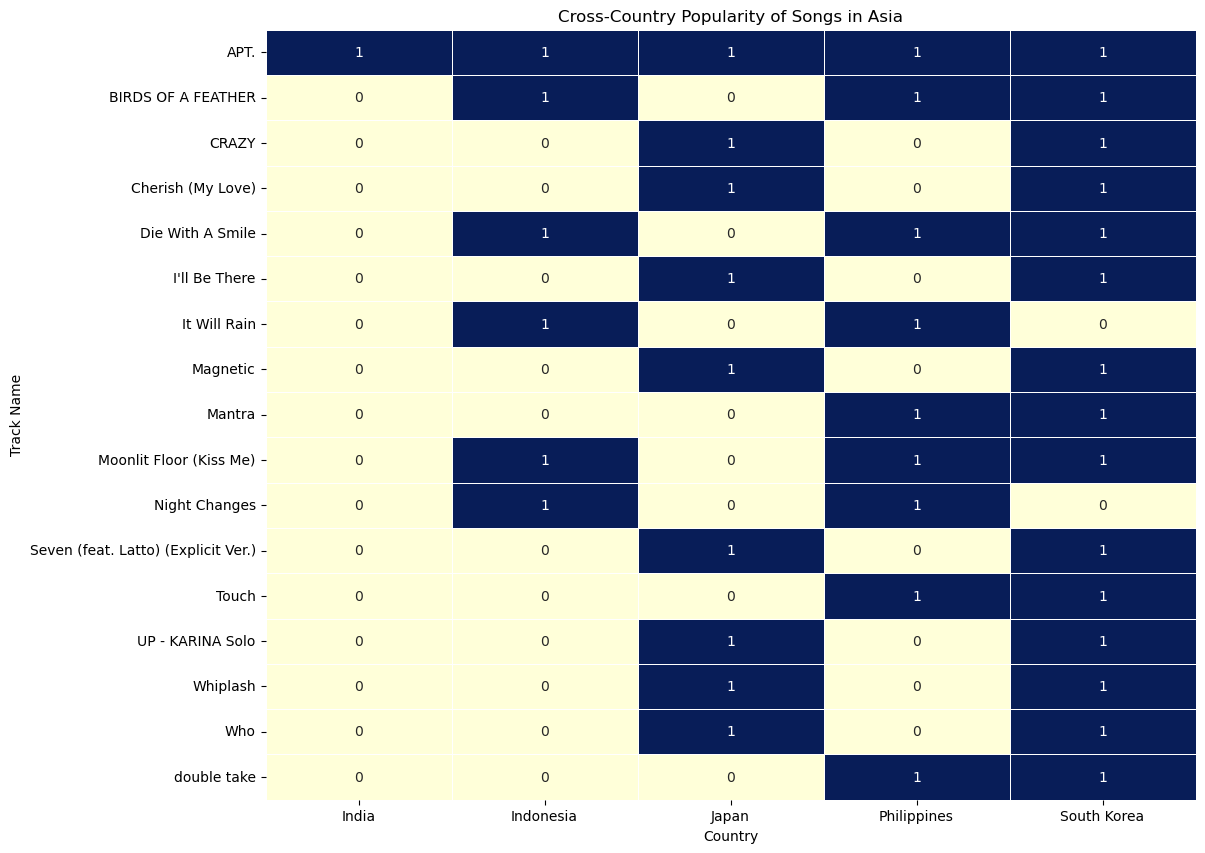

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Expand the 'Country_Top_50' column to multiple rows for each country in the list
expanded_data = hits_playlist.set_index('Track_Name')['Country_Top_50'].str.split(', ').explode().reset_index()

# Create a binary pivot table with track names as rows and countries as columns
heatmap_data = pd.crosstab(expanded_data['Track_Name'], expanded_data['Country_Top_50'])

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, cbar=False, annot=True, fmt="d")
plt.title("Cross-Country Popularity of Songs in Asia")
plt.xlabel("Country")
plt.ylabel("Track Name")
plt.show()

In [12]:
song_country_counts.to_excel("Song Counts.xlsx")

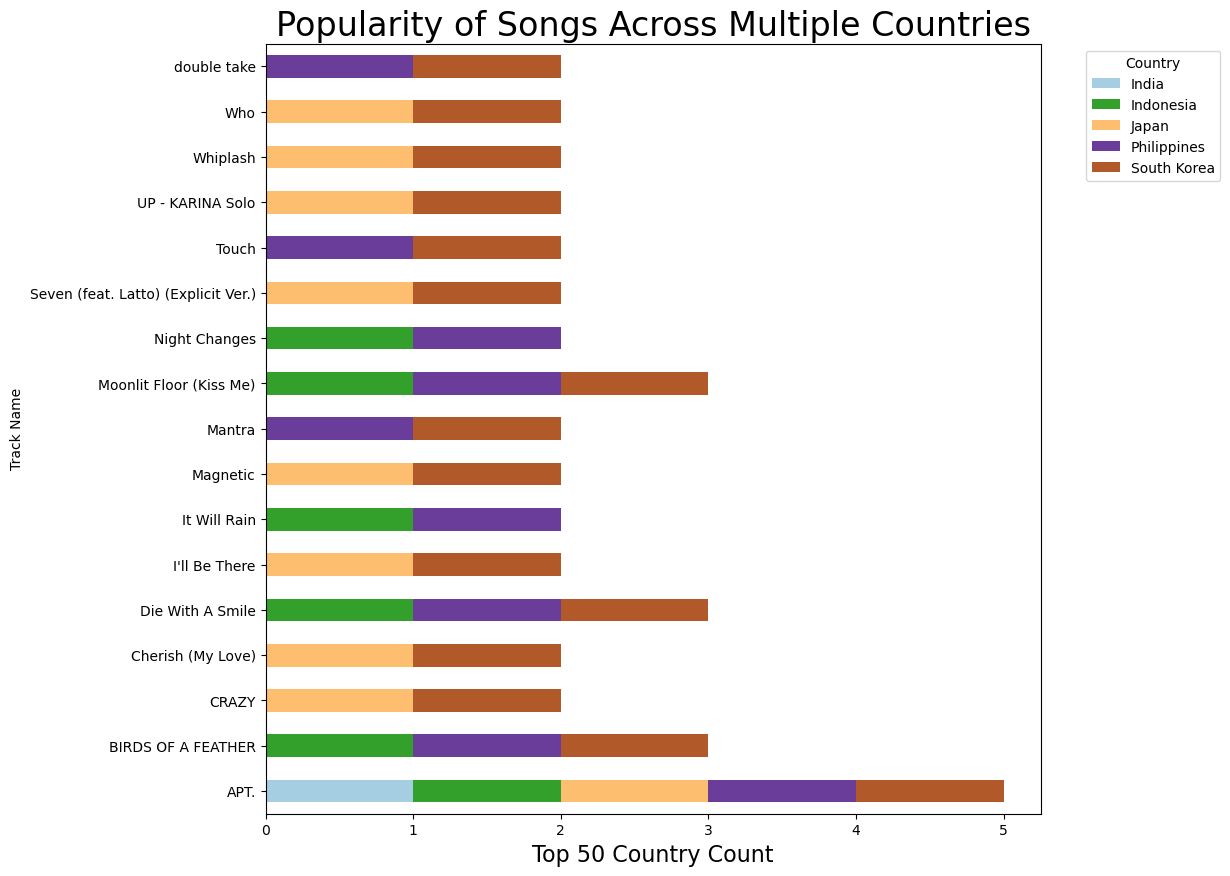

In [10]:
import matplotlib.pyplot as plt

# Prepare data for stacked bar chart
song_country_counts = expanded_data.groupby(['Track_Name', 'Country_Top_50']).size().unstack(fill_value=0)

# Plot stacked bar chart
song_country_counts.plot(kind='barh', stacked=True, figsize=(10, 10), colormap="Paired")
plt.title("Popularity of Songs Across Multiple Countries", size = 24)
plt.ylabel("Track Name")
plt.xlabel("Top 50 Country Count", size=16)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

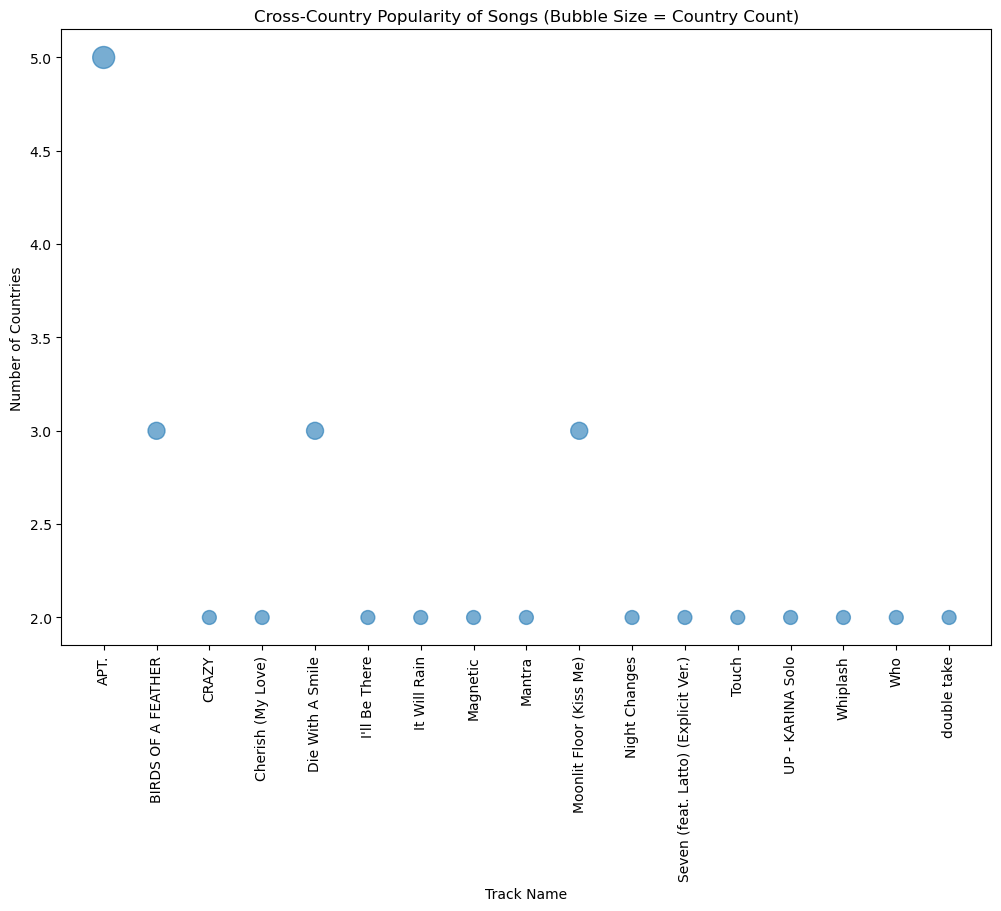

In [ ]:
# Calculate the number of countries each song is trending in
country_counts = hits_playlist[['Track_Name', 'Country_Counts']].set_index('Track_Name')

plt.figure(figsize=(12, 8))
plt.scatter(country_counts.index, country_counts['Country_Counts'], s=country_counts['Country_Counts']*50, alpha=0.6)
plt.xlabel("Track Name")
plt.ylabel("Number of Countries")
plt.title("Cross-Country Popularity of Songs (Bubble Size = Country Count)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate average mood features for each track
mood_features = trending_songs.groupby('track_name')[['danceability', 'energy', 'tempo', 'valence', 'mode_majorminor']].mean().reset_index()

# Merge the mood features with hits_playlist to include country counts and country information
mood_features = mood_features.merge(hits_playlist, left_on='track_name', right_on='Track_Name')

# Display the result
mood_features.to_excel("Moodfeatures.xlsx")

DIVIDE : 
Top country 5 and Top Country 3 and Top country 2

SEE Each of them : 
- Danceability
- Energy
- Tempo
- Valence
- Mode 

IF same, make a visualization. 
IF not, make a narration.

IF Can, compare between them. 


In [ ]:
# Filter datasets by country count
top_country_5 = mood_features[mood_features['Country_Counts'] == 5]
top_country_3 = mood_features[mood_features['Country_Counts'] == 3]
top_country_2 = mood_features[mood_features['Country_Counts'] == 2]

In [ ]:
# Calculate average mood characteristics for each group
top_country_5_avg = top_country_5[['danceability', 'energy', 'tempo', 'valence', 'mode_majorminor']].mean()
top_country_3_avg = top_country_3[['danceability', 'energy', 'tempo', 'valence', 'mode_majorminor']].mean()
top_country_2_avg = top_country_2[['danceability', 'energy', 'tempo', 'valence', 'mode_majorminor']].mean()


# Calculate average mood characteristics for each group
top_country_5_avg = top_country_5[['danceability', 'energy', 'tempo', 'valence', 'mode_majorminor']].mean()
top_country_3_avg = top_country_3[['danceability', 'energy', 'tempo', 'valence', 'mode_majorminor']].mean()
top_country_2_avg = top_country_2[['danceability', 'energy', 'tempo', 'valence', 'mode_majorminor']].mean()

In [ ]:
display(top_country_5,top_country_3,top_country_2)

,track_name,danceability,energy,tempo,valence,mode_majorminor,Track_Name,Country_Top_50,Country_Counts
0,APT.,0.777,0.783,149.027,0.939,0.0,APT.,"Indonesia, Japan, South Korea, Philippines, India",5


,track_name,danceability,energy,tempo,valence,mode_majorminor,Track_Name,Country_Top_50,Country_Counts
1,BIRDS OF A FEATHER,0.747,0.507,104.978,0.438,1.0,BIRDS OF A FEATHER,"Indonesia, South Korea, Philippines",3
4,Die With A Smile,0.521,0.592,157.969,0.535,0.0,Die With A Smile,"Indonesia, South Korea, Philippines",3
9,Moonlit Floor (Kiss Me),0.733,0.786,109.954,0.672,0.0,Moonlit Floor (Kiss Me),"Indonesia, South Korea, Philippines",3


,track_name,danceability,energy,tempo,valence,mode_majorminor,Track_Name,Country_Top_50,Country_Counts
2,CRAZY,0.802,0.8990,130.0470,0.5310,0.0,CRAZY,"Japan, South Korea",2
3,Cherish (My Love),0.714,0.8210,142.9700,0.3030,1.0,Cherish (My Love),"Japan, South Korea",2
5,I'll Be There,0.538,0.7380,148.8870,0.7360,1.0,I'll Be There,"Japan, South Korea",2
6,It Will Rain,0.576,0.8350,150.0170,0.4760,1.0,It Will Rain,"Indonesia, Philippines",2
7,Magnetic,0.797,0.6680,131.0670,0.6900,1.0,Magnetic,"Japan, South Korea",2
8,Mantra,0.894,0.7250,116.9880,0.8380,0.0,Mantra,"South Korea, Philippines",2
10,Night Changes,0.672,0.5200,120.0010,0.3700,1.0,Night Changes,"Indonesia, Philippines",2
11,Seven (feat. Latto) (Explicit Ver.),0.790,0.8310,124.9870,0.8720,1.0,Seven (feat. Latto) (Explicit Ver.),"Japan, South Korea",2
12,Touch,0.739,0.9040,167.0330,0.7880,0.0,Touch,"South Korea, Philippines",2
13,UP - KARINA Solo,0.777,0.7810,98.9700,0.3820,0.0,UP - KARINA Solo,"Japan, South Korea",2


INSIGHTS : 

In 5 country : 
- Minor (0)
- Danceability High 
- Tempo Very High.
- Energy High. (0-1)
- Valence middle-high valence. positive. happy, cheerful, euphoric.

In 3 country : 
-  Major minor doesn't matter. 
- Danceability High (0-1)
- Tempo High
- Energy High. (0-1)
- Valence middle-high valence. positive. happy, cheerful, euphoric.

In 2 country : 
-  Major minor doesn't matter. 
- Danceability Cenderung Arah ke Very High
- Tempo High
- Energy High. (0-1)
- Several songs valence low (negative) represent market utk negative.But most still positive. 




In [ ]:
display(top_country_5_avg,top_country_3_avg,top_country_2_avg)

danceability         0.777
energy               0.783
tempo              149.027
valence              0.939
mode_majorminor      0.000
dtype: float64

danceability         0.667000
energy               0.628333
tempo              124.300333
valence              0.548333
mode_majorminor      0.333333
dtype: float64

danceability         0.728769
energy               0.755038
tempo              129.403577
valence              0.596885
mode_majorminor      0.538462
dtype: float64

INSIGHTS : 

- Major minor doesn't matter. 
- Danceability High (0-1)
- Tempo High
- Energy High. (0-1)
- Valence middle-high valence. positive. happy, cheerful, euphoric.



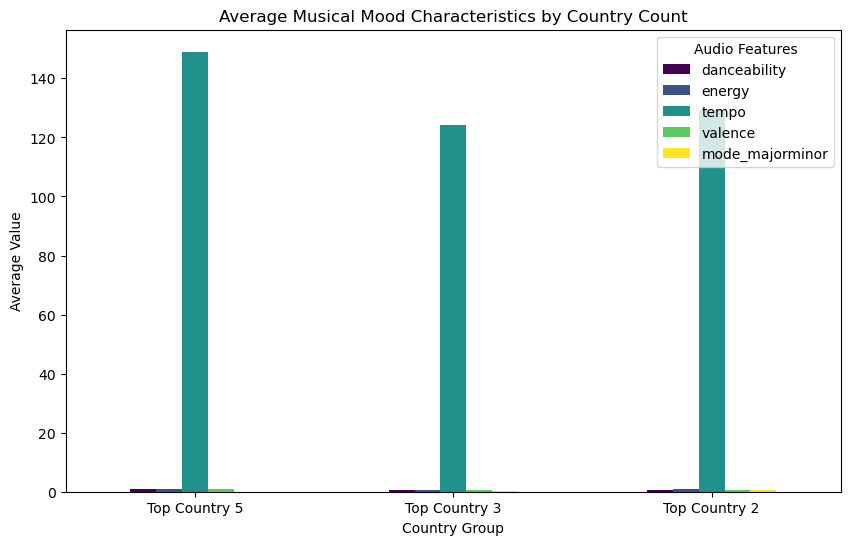

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine averages into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Top Country 5': top_country_5_avg,
    'Top Country 3': top_country_3_avg,
    'Top Country 2': top_country_2_avg
}).T

# Plot the grouped bar chart
comparison_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Average Musical Mood Characteristics by Country Count")
plt.xlabel("Country Group")
plt.ylabel("Average Value")
plt.legend(title="Audio Features")
plt.xticks(rotation=0)
plt.show()

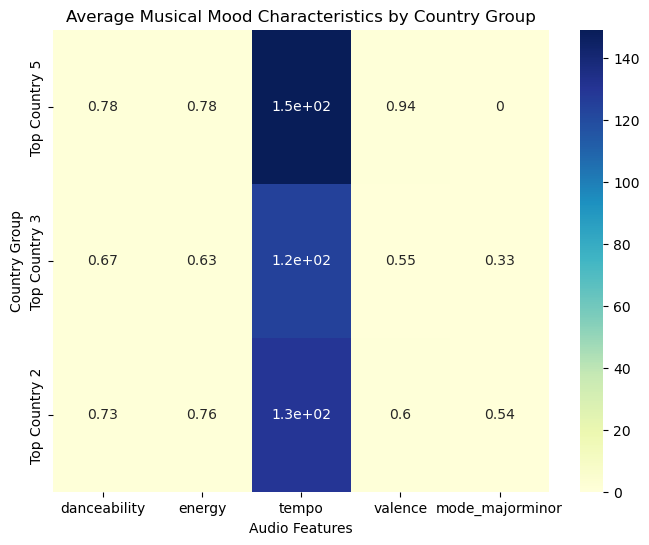

In [ ]:
import seaborn as sns


sn(figsize=(8, 6))
sns.bar(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("Average Musical Mood Characteristics by Country Group")
plt.xlabel("Audio Features")
plt.ylabel("Country Group")
plt.show()

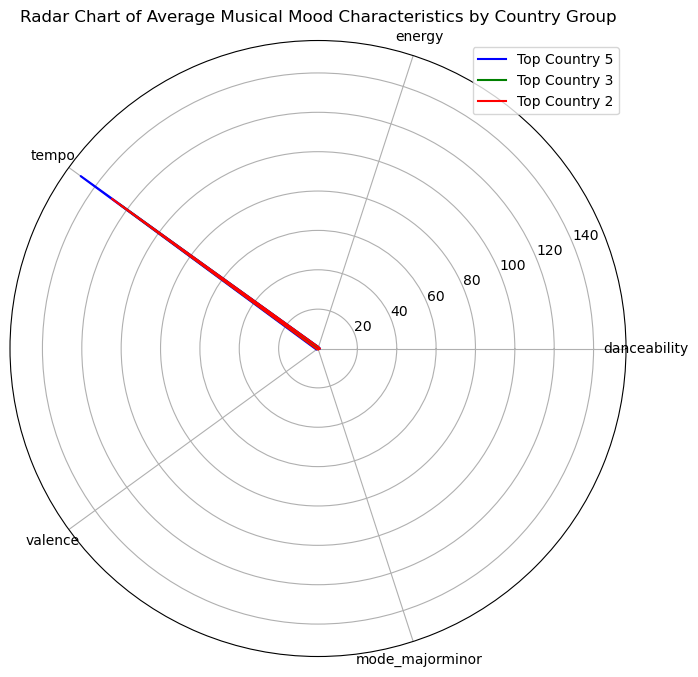

In [ ]:
import numpy as np

# Define categories and values for each group
categories = ['danceability', 'energy', 'tempo', 'valence', 'mode_majorminor']
values_5 = top_country_5_avg.values.flatten()
values_3 = top_country_3_avg.values.flatten()
values_2 = top_country_2_avg.values.flatten()

# Close the circle for radar chart
values_5 = np.concatenate((values_5, [values_5[0]]))
values_3 = np.concatenate((values_3, [values_3[0]]))
values_2 = np.concatenate((values_2, [values_2[0]]))
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values_5, label="Top Country 5", color='b')
ax.fill(angles, values_5, color='b', alpha=0.2)
ax.plot(angles, values_3, label="Top Country 3", color='g')
ax.fill(angles, values_3, color='g', alpha=0.2)
ax.plot(angles, values_2, label="Top Country 2", color='r')
ax.fill(angles, values_2, color='r', alpha=0.2)

# Labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Radar Chart of Average Musical Mood Characteristics by Country Group")
plt.legend(loc='upper right')
plt.show()